In [2]:
#Launch commands to automatically reload modules
%load_ext autoreload
%autoreload 2

In [3]:
#Load libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#Load dataset into a dataframe
data = pd.read_csv('../data/processed/final_dataset.csv')

In [5]:
data.shape

(25456, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25456 entries, 0 to 25455
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Country                         25456 non-null  object 
 1   Total Cases                     25456 non-null  int64  
 2   New Cases                       25456 non-null  float64
 3   Total Deaths                    25456 non-null  float64
 4   New Deaths                      25456 non-null  float64
 5   Total Recovered                 25456 non-null  float64
 6   New Recovered                   25456 non-null  float64
 7   Active Cases                    25456 non-null  float64
 8   Serious, Critical               25456 non-null  float64
 9   Tot Cases/1M pop                25456 non-null  float64
 10  Deaths/1M pop                   25456 non-null  float64
 11  Total Tests                     25456 non-null  float64
 12  Tests/1M pop                    

In [8]:
data.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,...,Prevelance of Undernourishment,CO2,Health Expenditure %,Education Expenditure %,Unemployment,Corruption,Sanitation,Injuries,Communicable,NonCommunicable
0,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
1,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
2,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
3,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58
4,France,40138560,611.5,167642.0,15.857143,39970918.0,780.058824,0.0,1252.8,612013.0,...,2.5,300519.989,11.057472,4.444531,8.41,2.81746,78.589117,1973126.7,758581.72,15334917.58


In [9]:
# Grouping by 'Region' and calculating sum for each numeric column
grouped_data = data.groupby('Region').sum()
grouped_data.reset_index(inplace=True)

print(grouped_data)

                       Region   
0         East Asia & Pacific  \
1       Europe & Central Asia   
2   Latin America & Caribbean   
3  Middle East & North Africa   
4                  South Asia   
5          Sub-Saharan Africa   

                                             Country   Total Cases  New Cases   
0  JapanJapanJapanJapanJapanJapanJapanJapanJapanJ...    7605803700   137587.5  \
1  FranceFranceFranceFranceFranceFranceFranceFran...  239324169215  9824204.0   
2  ArgentinaArgentinaArgentinaArgentinaArgentinaA...   42353157338  4725672.0   
3  MaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaMaltaM...      28891296   145537.0   
4  NepalNepalNepalNepalNepalNepalNepalNepalNepalN...     175603750   107012.5   
5  South AfricaSouth AfricaSouth AfricaSouth Afri...     203823150    30575.0   

   Total Deaths     New Deaths  Total Recovered  New Recovered  Active Cases   
0  1.680615e+07    3567.857143     2.245535e+09   1.755132e+05  5.958551e+07  \
1  1.470559e+09  291751.571429     2.451

In [25]:
# Selecting specific columns from the current DataFrame
Q1 = data.loc[:, ['Region', 'Country', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Tests/1M pop', 'total_vaccinations', 'Year']]

# Displaying the first few rows of Q1
print(Q1.head())

                  Region Country  Tot Cases/1M pop  Deaths/1M pop   
0  Europe & Central Asia  France          612013.0         2556.0  \
1  Europe & Central Asia  France          612013.0         2556.0   
2  Europe & Central Asia  France          612013.0         2556.0   
3  Europe & Central Asia  France          612013.0         2556.0   
4  Europe & Central Asia  France          612013.0         2556.0   

   Tests/1M pop  total_vaccinations  Year  
0     4139547.0                 593  2019  
1     4139547.0                1242  2019  
2     4139547.0                1610  2019  
3     4139547.0                2043  2019  
4     4139547.0                2403  2019  


In [27]:
import matplotlib.pyplot as plt

# Sorting the DataFrame by 'Tot Cases/1M pop' column in ascending order
Q1_sorted = Q1.sort_values(by='Tot Cases/1M pop')

C:\Users\joann\AppData\Local\Temp\ipykernel_3408\4049207429.py:10: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


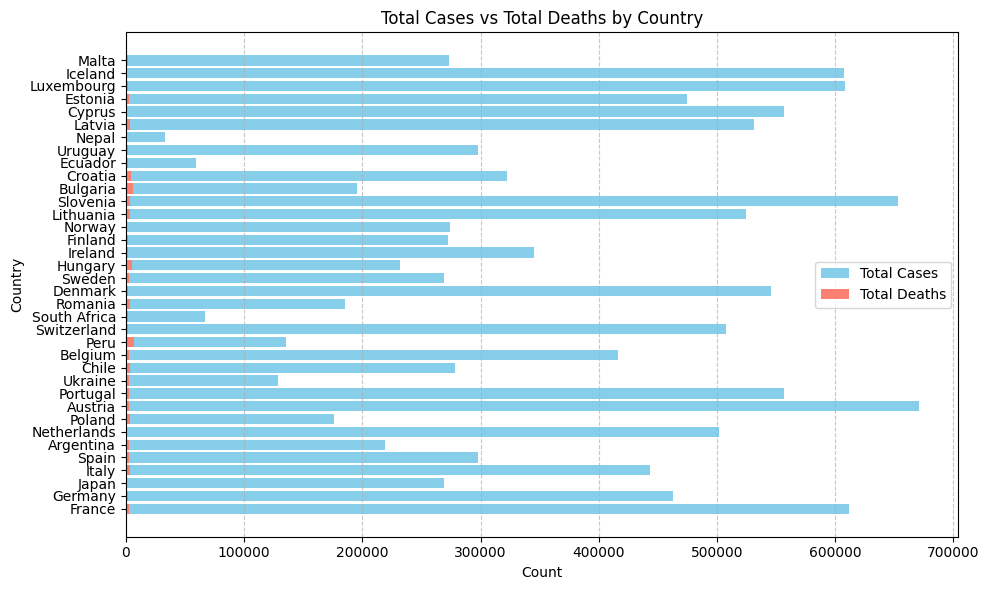

In [28]:
# Plotting the data
plt.figure(figsize=(10, 6))
plt.barh(Q1['Country'], Q1['Tot Cases/1M pop'], color='skyblue', label='Total Cases')
plt.barh(Q1['Country'], Q1['Deaths/1M pop'], color='salmon', label='Total Deaths')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Total Cases vs Total Deaths by Country')
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

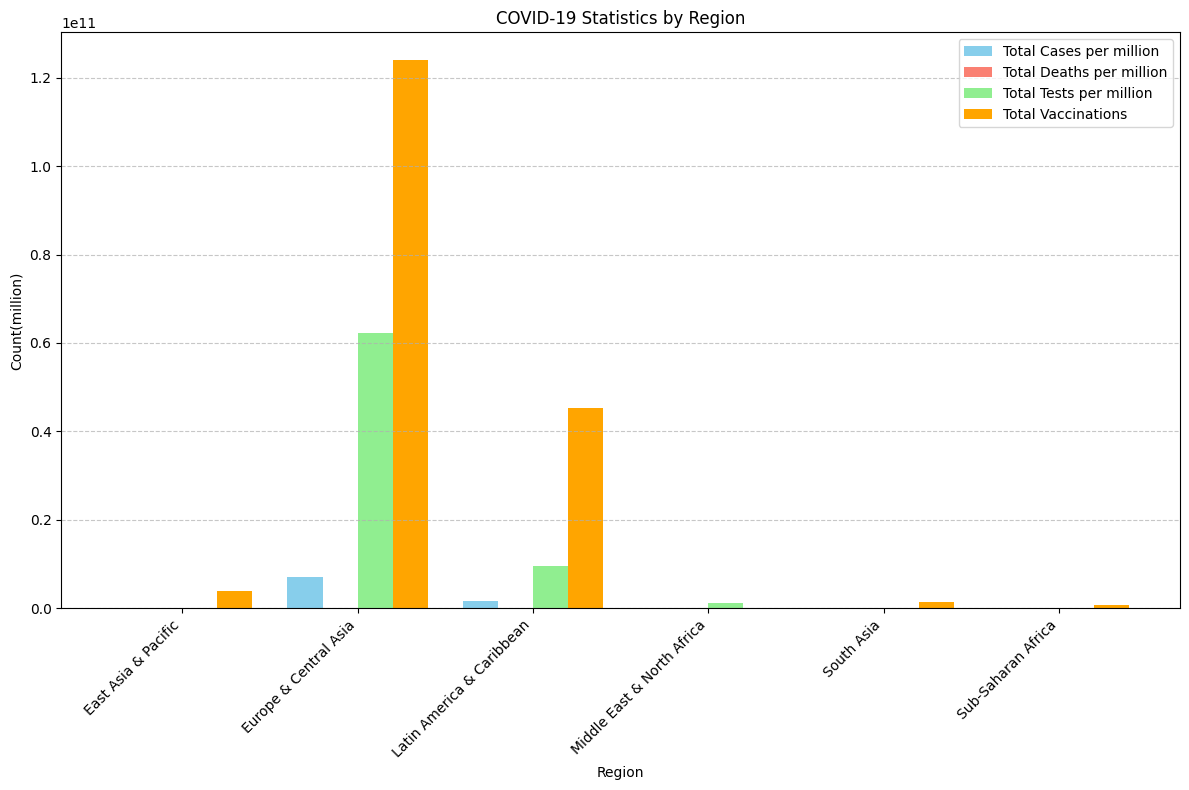

In [29]:
# Grouping the data by region and summing the total cases, total deaths, total tests, and total vaccinations
grouped_data = Q1.groupby('Region').sum()

# Plotting the data
plt.figure(figsize=(12, 8))
bar_width = 0.2
index = range(len(grouped_data))

plt.bar(index, grouped_data['Tot Cases/1M pop'], width=bar_width, color='skyblue', label='Total Cases per million')
plt.bar([i + bar_width for i in index], grouped_data['Deaths/1M pop'], width=bar_width, color='salmon', label='Total Deaths per million')
plt.bar([i + bar_width*2 for i in index], grouped_data['Tests/1M pop'], width=bar_width, color='lightgreen', label='Total Tests per million')
plt.bar([i + bar_width*3 for i in index], grouped_data['total_vaccinations'], width=bar_width, color='orange', label='Total Vaccinations')

plt.xlabel('Region')
plt.ylabel('Count(million)')
plt.title('COVID-19 Statistics by Region')
plt.xticks([i + 1.5*bar_width for i in index], grouped_data.index, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()